<h1>Case Study 3 - Chemical Industry</h1>

<h2>Problem Background</h2>

DestroyNature is a leading chemical company across the globe. The company is on corporate social responsibility mission, it wants to identify the biodegradable products based on a study of the relationships between chemical structure and biodegradation of molecules. This research can lead DestroyNature to create a unique biodegradable packaging material, leading to massive profits in the future.

**Requirments**

It is required to create an ML model that would classify the chemical structure as RB (Ready BioDegradable) and NRB (Not Ready Biodegradable). At least three different models must be tested for the task, in order to choose the model with the best performance.

**Data**

1055 records describing the chemical structure of products.

<h2>Data Preparation</h2>

For this task, the data is stored in a CSV file. However, the data representing the chemical structure is stored in one column as semicolon-separated unnamed attributes. Therefore, the first step is to separate the attributes in columns using MS Excel before reading the file to a Pandas dataframe.

In [1]:
#import the needed libraries
import pandas as pd
import numpy as np

In [2]:
#read the data from CSV file
df_main = pd.read_csv('DestroyNature_cleaned.csv', header=None)
#explore the dataframe
print(df_main.shape)
df_main.head()

(1055, 42)


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB


In [3]:
#set names for the columns -Attributes- with the last column -Class- being the target variable
df_main.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10',
                  'A11','A12','A13','A14','A15','A16','A17','A18','A19','A20',
                  'A21','A22','A23','A24','A25','A26','A27','A28','A29','A30',
                  'A31','A32','A33','A34','A35','A36','A37','A38','A39','A40',
                   'A41','Class']
df_main.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A33,A34,A35,A36,A37,A38,A39,A40,A41,Class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB


In [4]:
#make sure all the datatypes the classifier will work on are numerical
df_main.dtypes

A1       float64
A2       float64
A3         int64
A4         int64
A5         int64
A6         int64
A7         int64
A8       float64
A9         int64
A10        int64
A11        int64
A12      float64
A13      float64
A14      float64
A15      float64
A16        int64
A17      float64
A18      float64
A19        int64
A20        int64
A21        int64
A22      float64
A23        int64
A24        int64
A25        int64
A26        int64
A27      float64
A28      float64
A29        int64
A30      float64
A31      float64
A32        int64
A33        int64
A34        int64
A35        int64
A36      float64
A37      float64
A38        int64
A39      float64
A40        int64
A41        int64
Class     object
dtype: object

In [5]:
#define the input variables and the target variable for the classifier and convert to numpy array
X = df_main[['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10',
        'A11','A12','A13','A14','A15','A16','A17','A18','A19','A20',
        'A21','A22','A23','A24','A25','A26','A27','A28','A29','A30',
        'A31','A32','A33','A34','A35','A36','A37','A38','A39','A40',
        'A41']].values

y = df_main['Class'].values

In [6]:
#import library needed to normalize data
from sklearn import preprocessing

In [7]:
#normalize the input data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [8]:
#import library needed to split the data into train/test sets
from sklearn.model_selection import train_test_split

#split the data into train/test sets as 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
#show the size of each set
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (844, 41) (844,)
Test set: (211, 41) (211,)


<h2>Classification Models</h2>

We will train 3 classification models: KNN, SVM, and Logistic Regression. Then we will test each model's performance against the test set to compare results obtained.

<h3>1- KNN Classification</h3>

KNN assigns the class of the majority of a K number of nearest data neighbours to the target datapoint.

In [9]:
#import KNN from Scikit-learn
from sklearn.neighbors import KNeighborsClassifier
#import metrics to compare the KNN models for different values of K
from sklearn import metrics

In [10]:
#test the KNN model for different values of K and calculate accuracy
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

In [11]:
#import library needed to plot the accuracy curve
import matplotlib.pyplot as plt

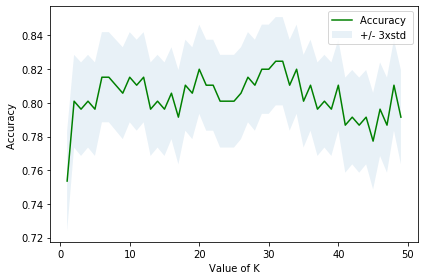

In [12]:
#plot the accuracy curve
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Value of K')
plt.tight_layout()
plt.show()

In [13]:
#see the value of K where the best accuracy was achieved
print( "The best accuracy was at", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was at 0.8246445497630331 with k= 31


In [14]:
#train the KNN model with best value of K
k = 31

kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')

<h3>2- SVM Classification</h3>

SVM maps the datapoints to a multi-dimensional space then finds the optimal hyperplane to seperate the data.

In [15]:
#import SVM from Scikit-learn
from sklearn import svm

In [16]:
#train the SVM model
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train)
SVM_model

C:\Users\GTS\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

<h3>3- Logistic Regression</h3>

Logistic Regression uses the Sigmoid Function to calculate the probability of each datapoint belonging to a certain class, then classifies accordingly.

In [17]:
#import Logistic Regression from Scikit-learn
from sklearn.linear_model import LogisticRegression

In [18]:
#train the LR model
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

C:\Users\GTS\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

<h2>Model Evaluation</h2>

To compare the performance of our model, three evaluation metrics will be used: Jaccard Index, F1-Score, and Log Loss.

In [19]:
#import the needed metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [20]:
#test the KNN model with the test set and calculate Jaccard Index and F1-Score
knn_yhat = kNN_model.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted'))

KNN Jaccard index: 0.82
KNN F1-score: 0.83


C:\Users\GTS\Anaconda\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [21]:
#test the SVM model with the test set and calculate Jaccard Index and F1-Score
SVM_yhat = SVM_model.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )

SVM Jaccard index: 0.86
SVM F1-score: 0.86


C:\Users\GTS\Anaconda\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [22]:
#test the LR model with the test set and calculate Jaccard Index, F1-Score, and Log Loss
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.80
LR F1-score: 0.80
LR LogLoss: 0.45


C:\Users\GTS\Anaconda\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


<h2>Summary of Results</h2>

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.82    | 0.83     | NA      |
| SVM                | 0.86    | 0.86     | NA      |
| LogisticRegression | 0.80    | 0.80     | 0.45    |

According to the above table, it is found that all models achieved over 80% accuracy. However, the SVM model appears to be the most suitable as it achieved an accuracy of 86% and therefore to be chosen as our main classifier for the problem.